In [1]:
%load_ext autoreload

In [2]:
%autoreload all

In [3]:
import os

import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *
from utils.model_evaluation.client_contribution import *

sns.set(font_scale=1.25)
sns.set_style('whitegrid')

In [4]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"
OUTPUT_TABLES = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/tables.tex"

In [5]:
if os.path.exists(OUTPUT_TABLES) and os.path.isfile(OUTPUT_TABLES):
    os.remove(OUTPUT_TABLES)

In [6]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [7]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [8]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

In [9]:
def log_table(df: pd.DataFrame, name: str) -> pd.DataFrame:
    with open(OUTPUT_TABLES, "a") as f:
        f.write(f"======= {name} =======\n")
        f.write(df.to_latex(float_format="%.3f"))
        f.write("\n\n")
    return df

# Runs

Each run/imbalance combination is in a different db file:

In [10]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240608_201758"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240609_091903"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [11]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

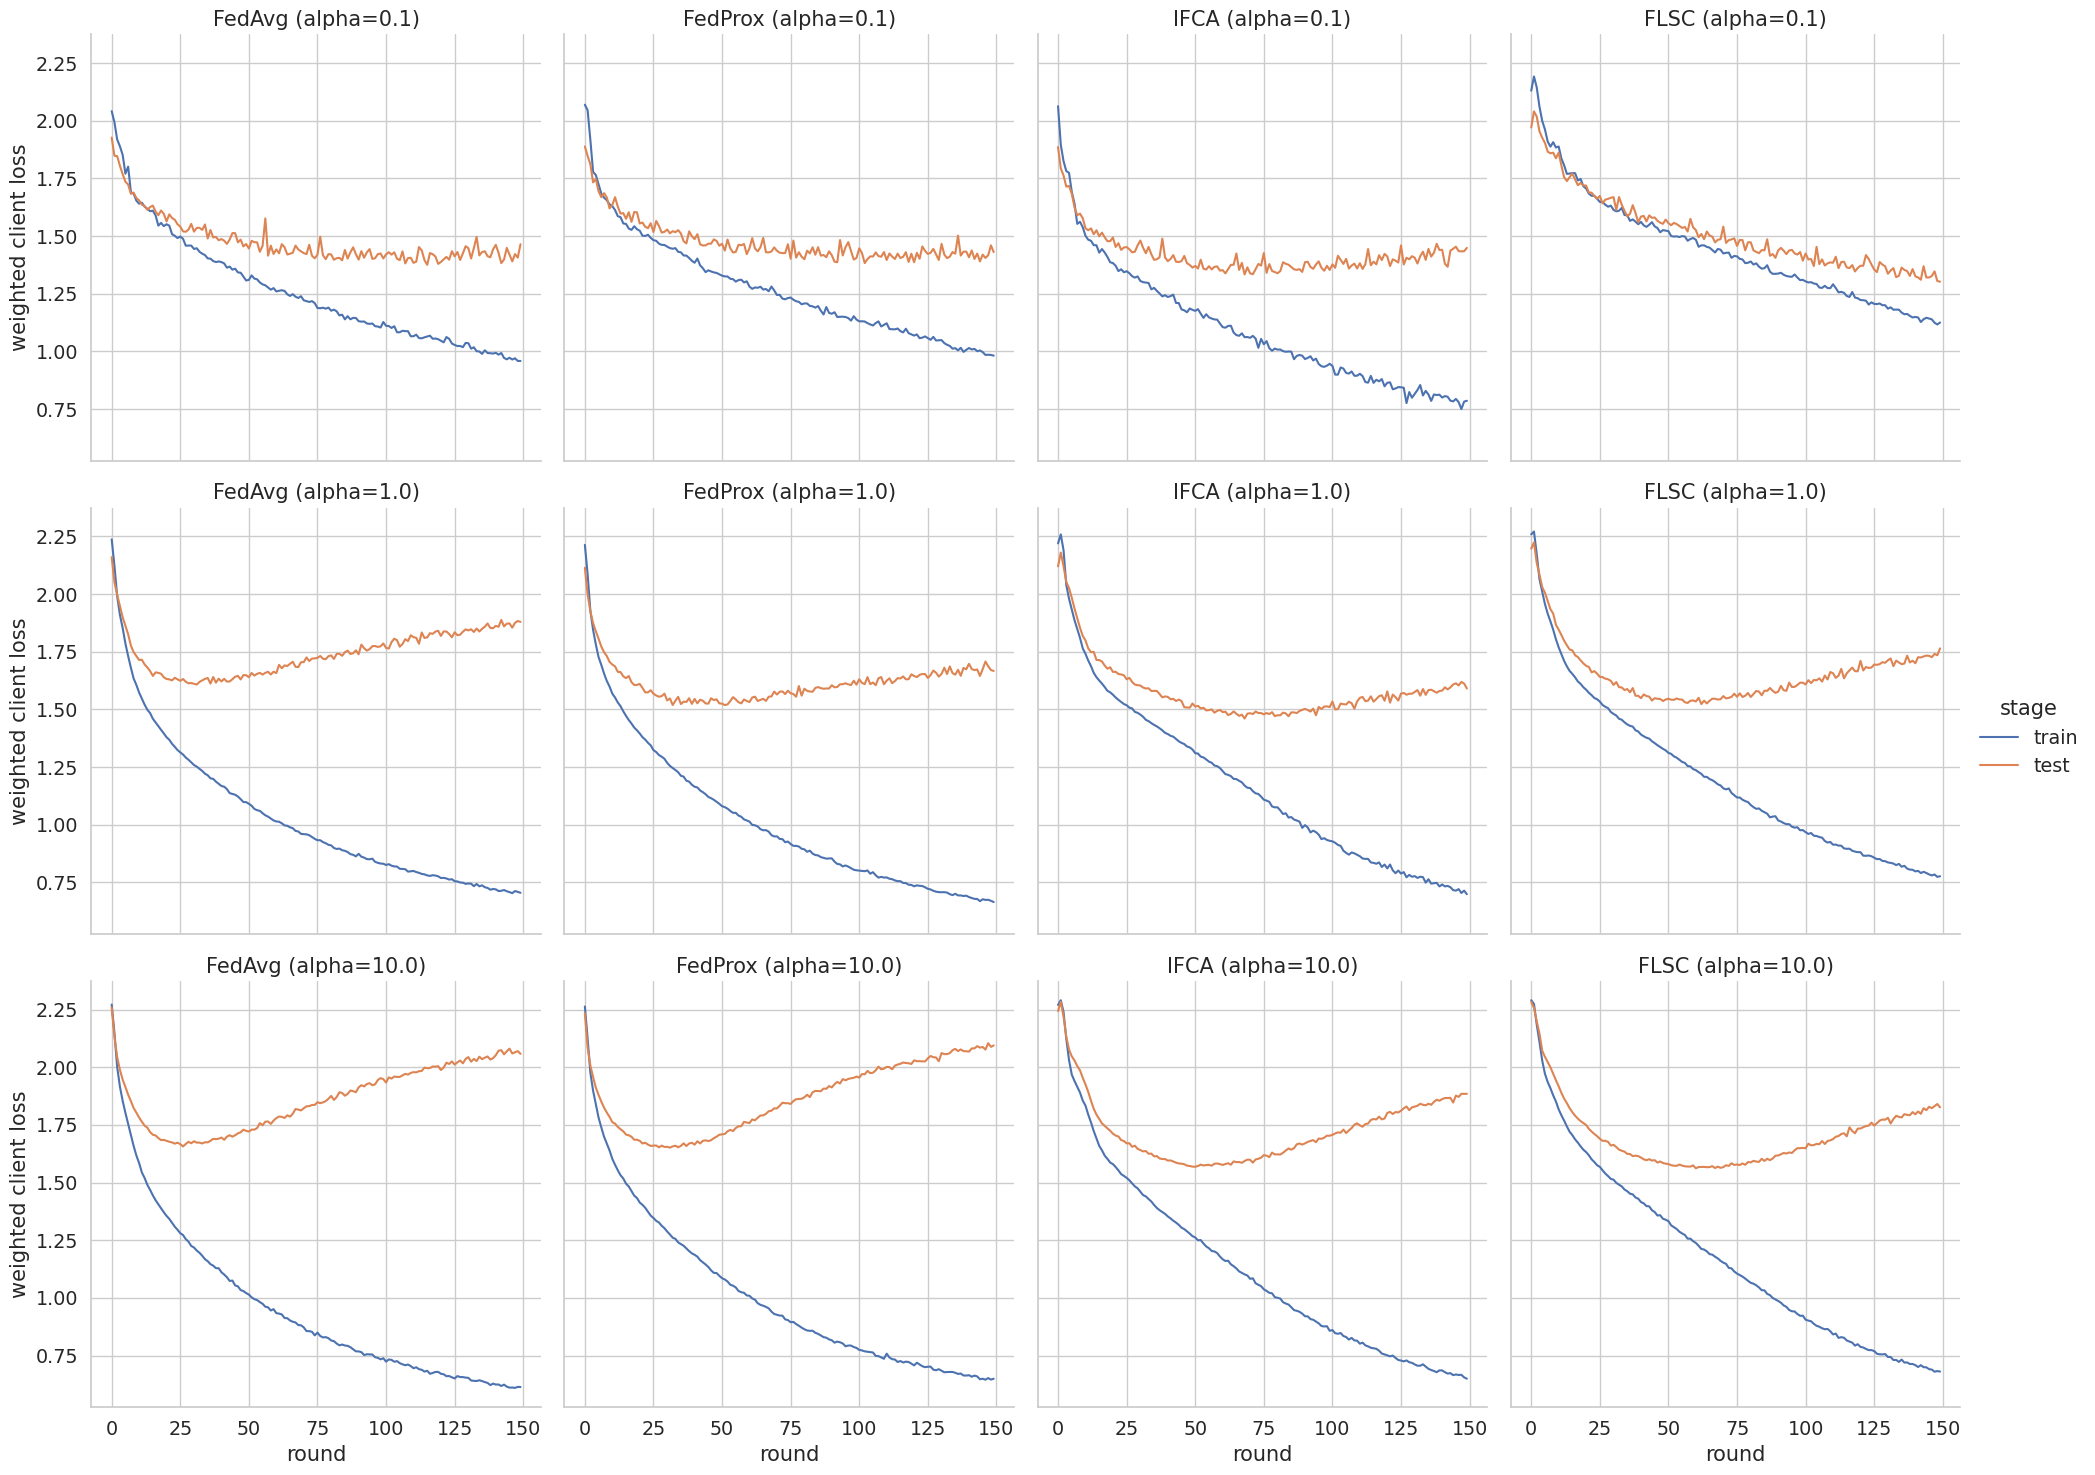

In [12]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

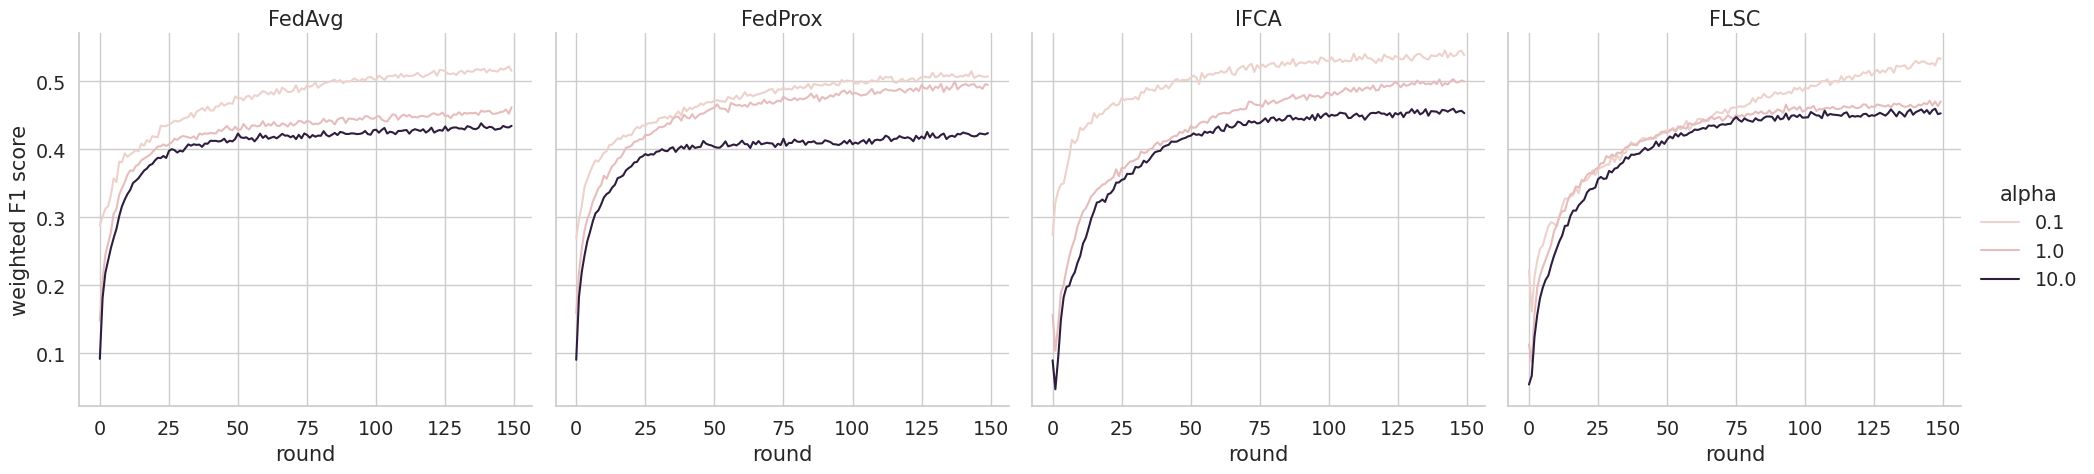

In [13]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

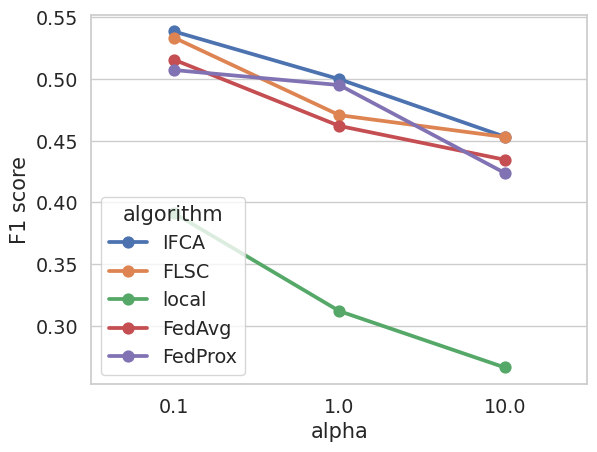

In [14]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [15]:
conn.close()

### MNIST

In [16]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

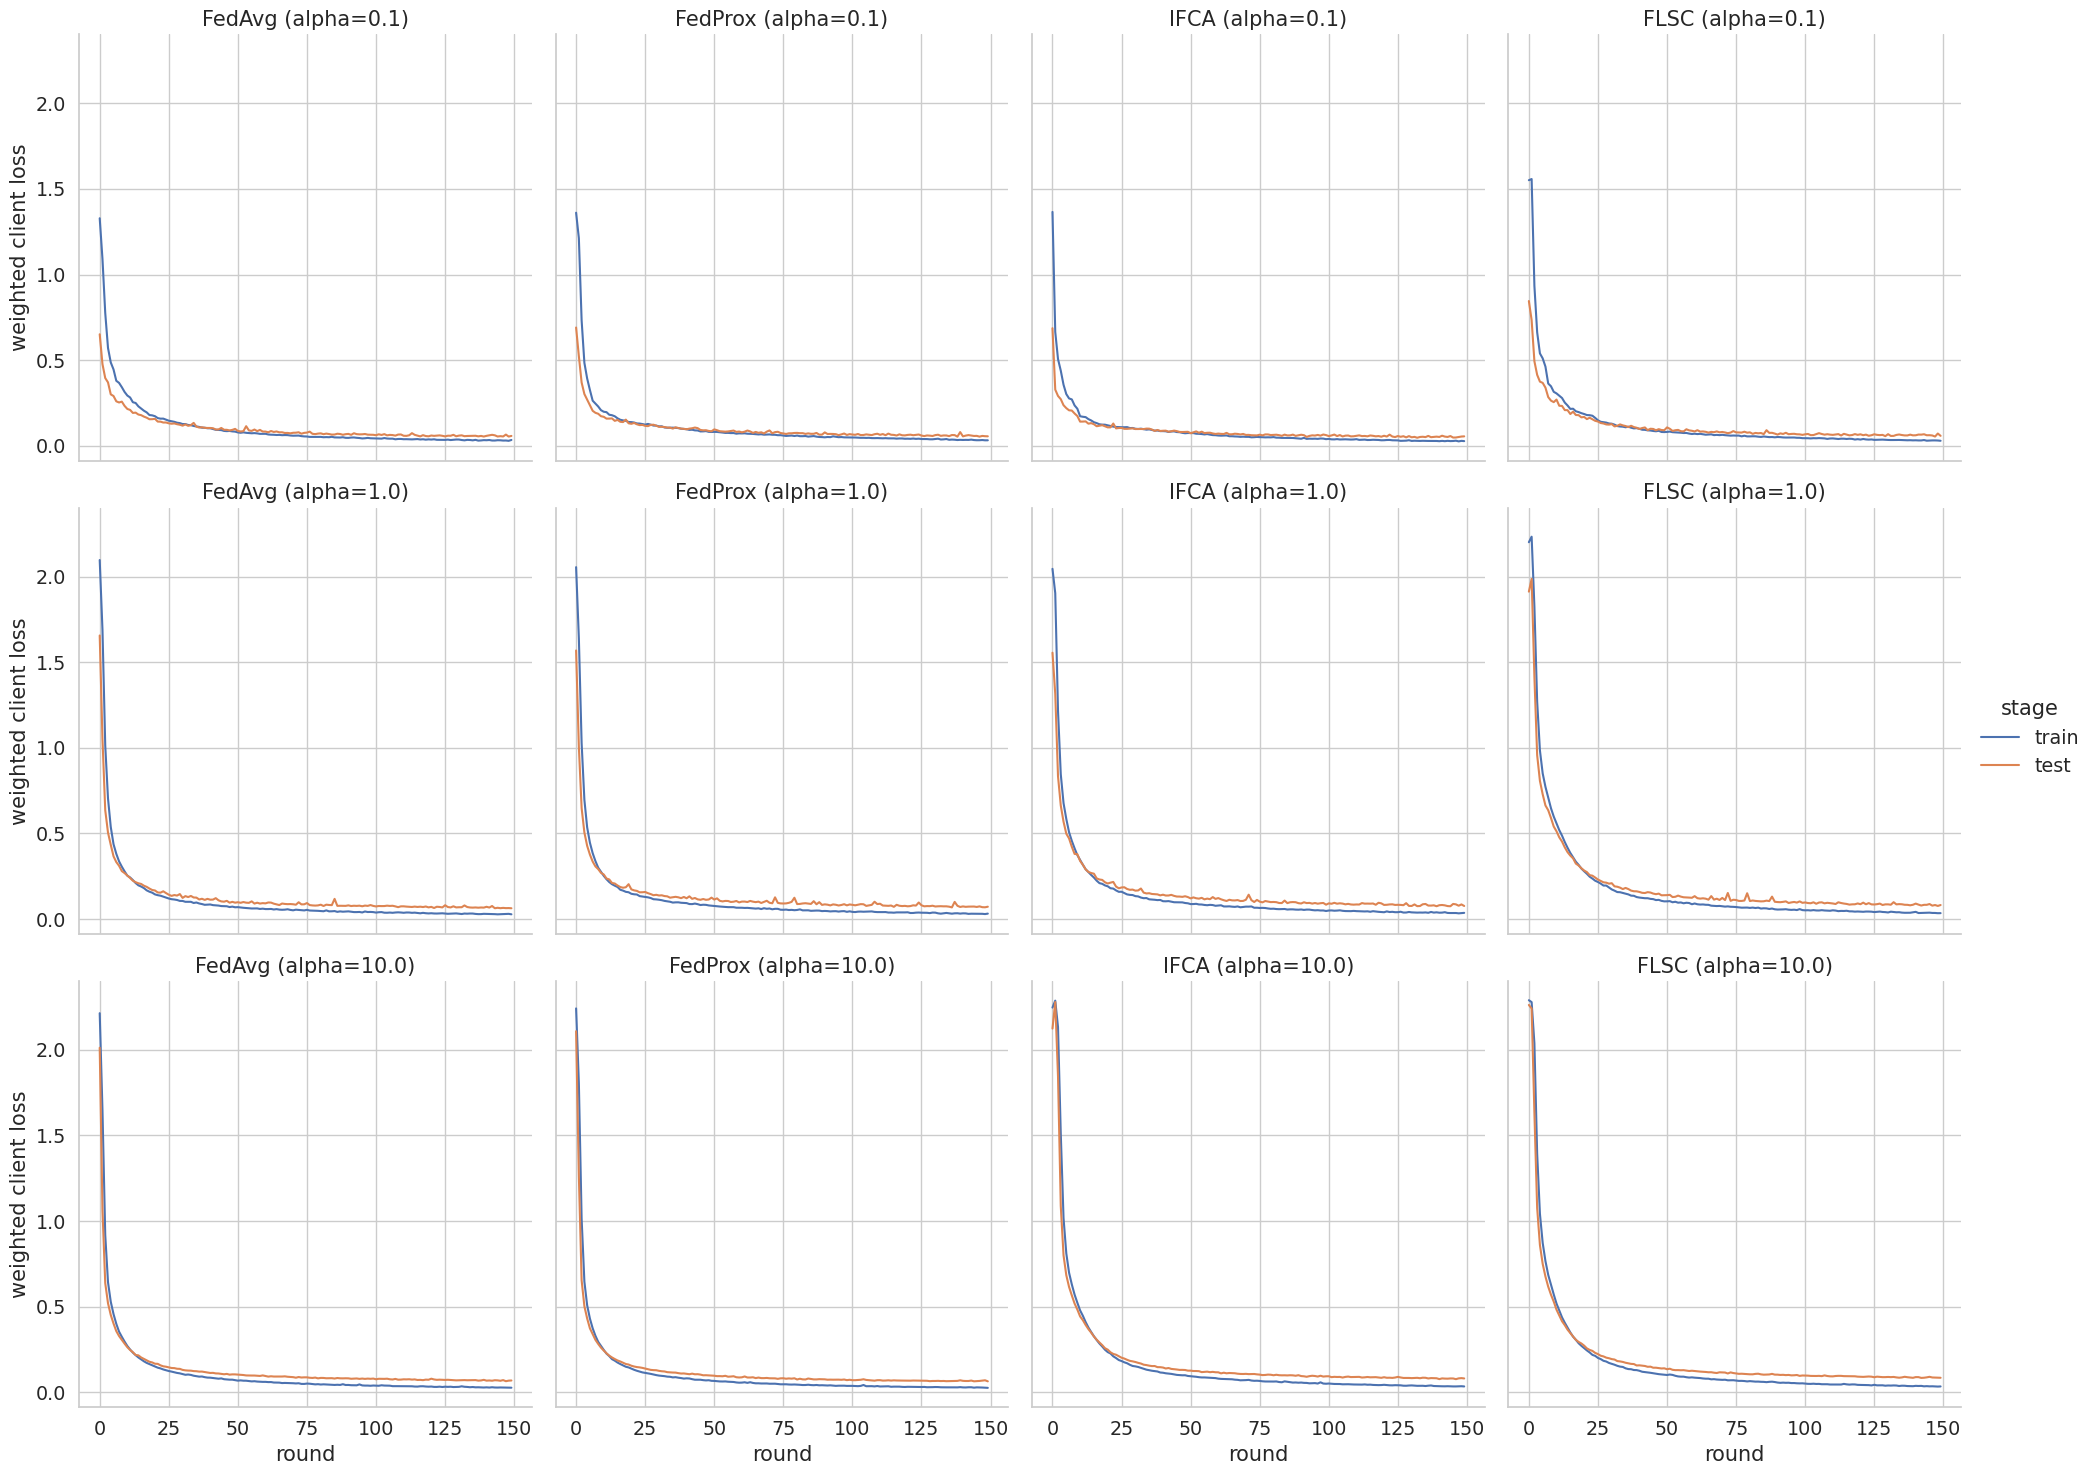

In [17]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

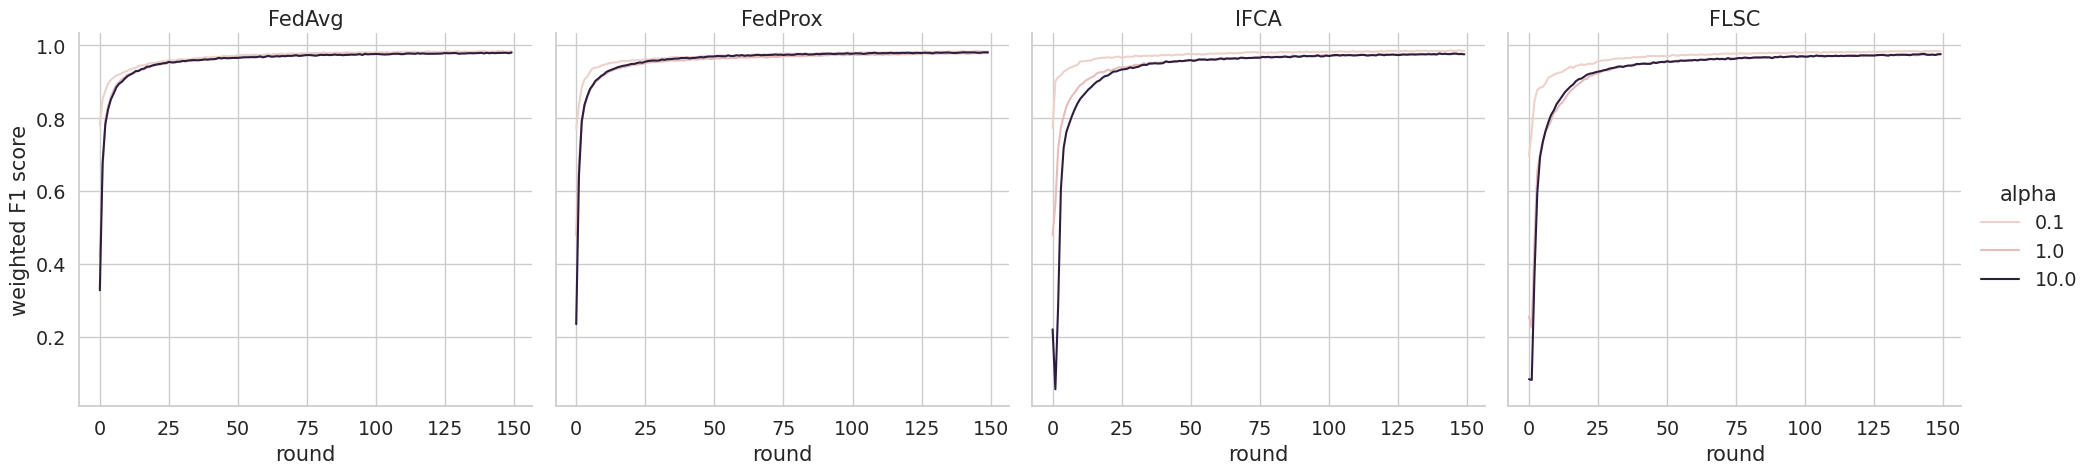

In [18]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

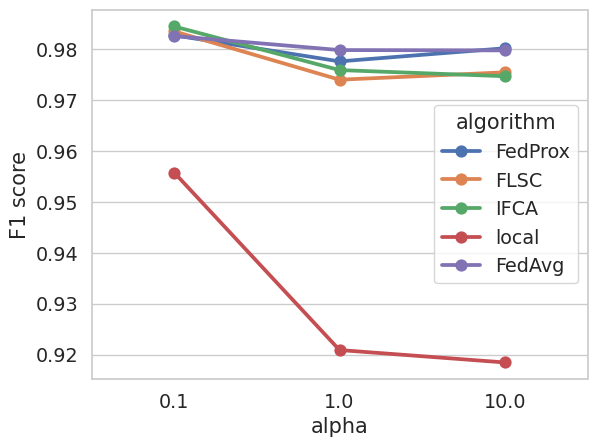

In [19]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [20]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [21]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

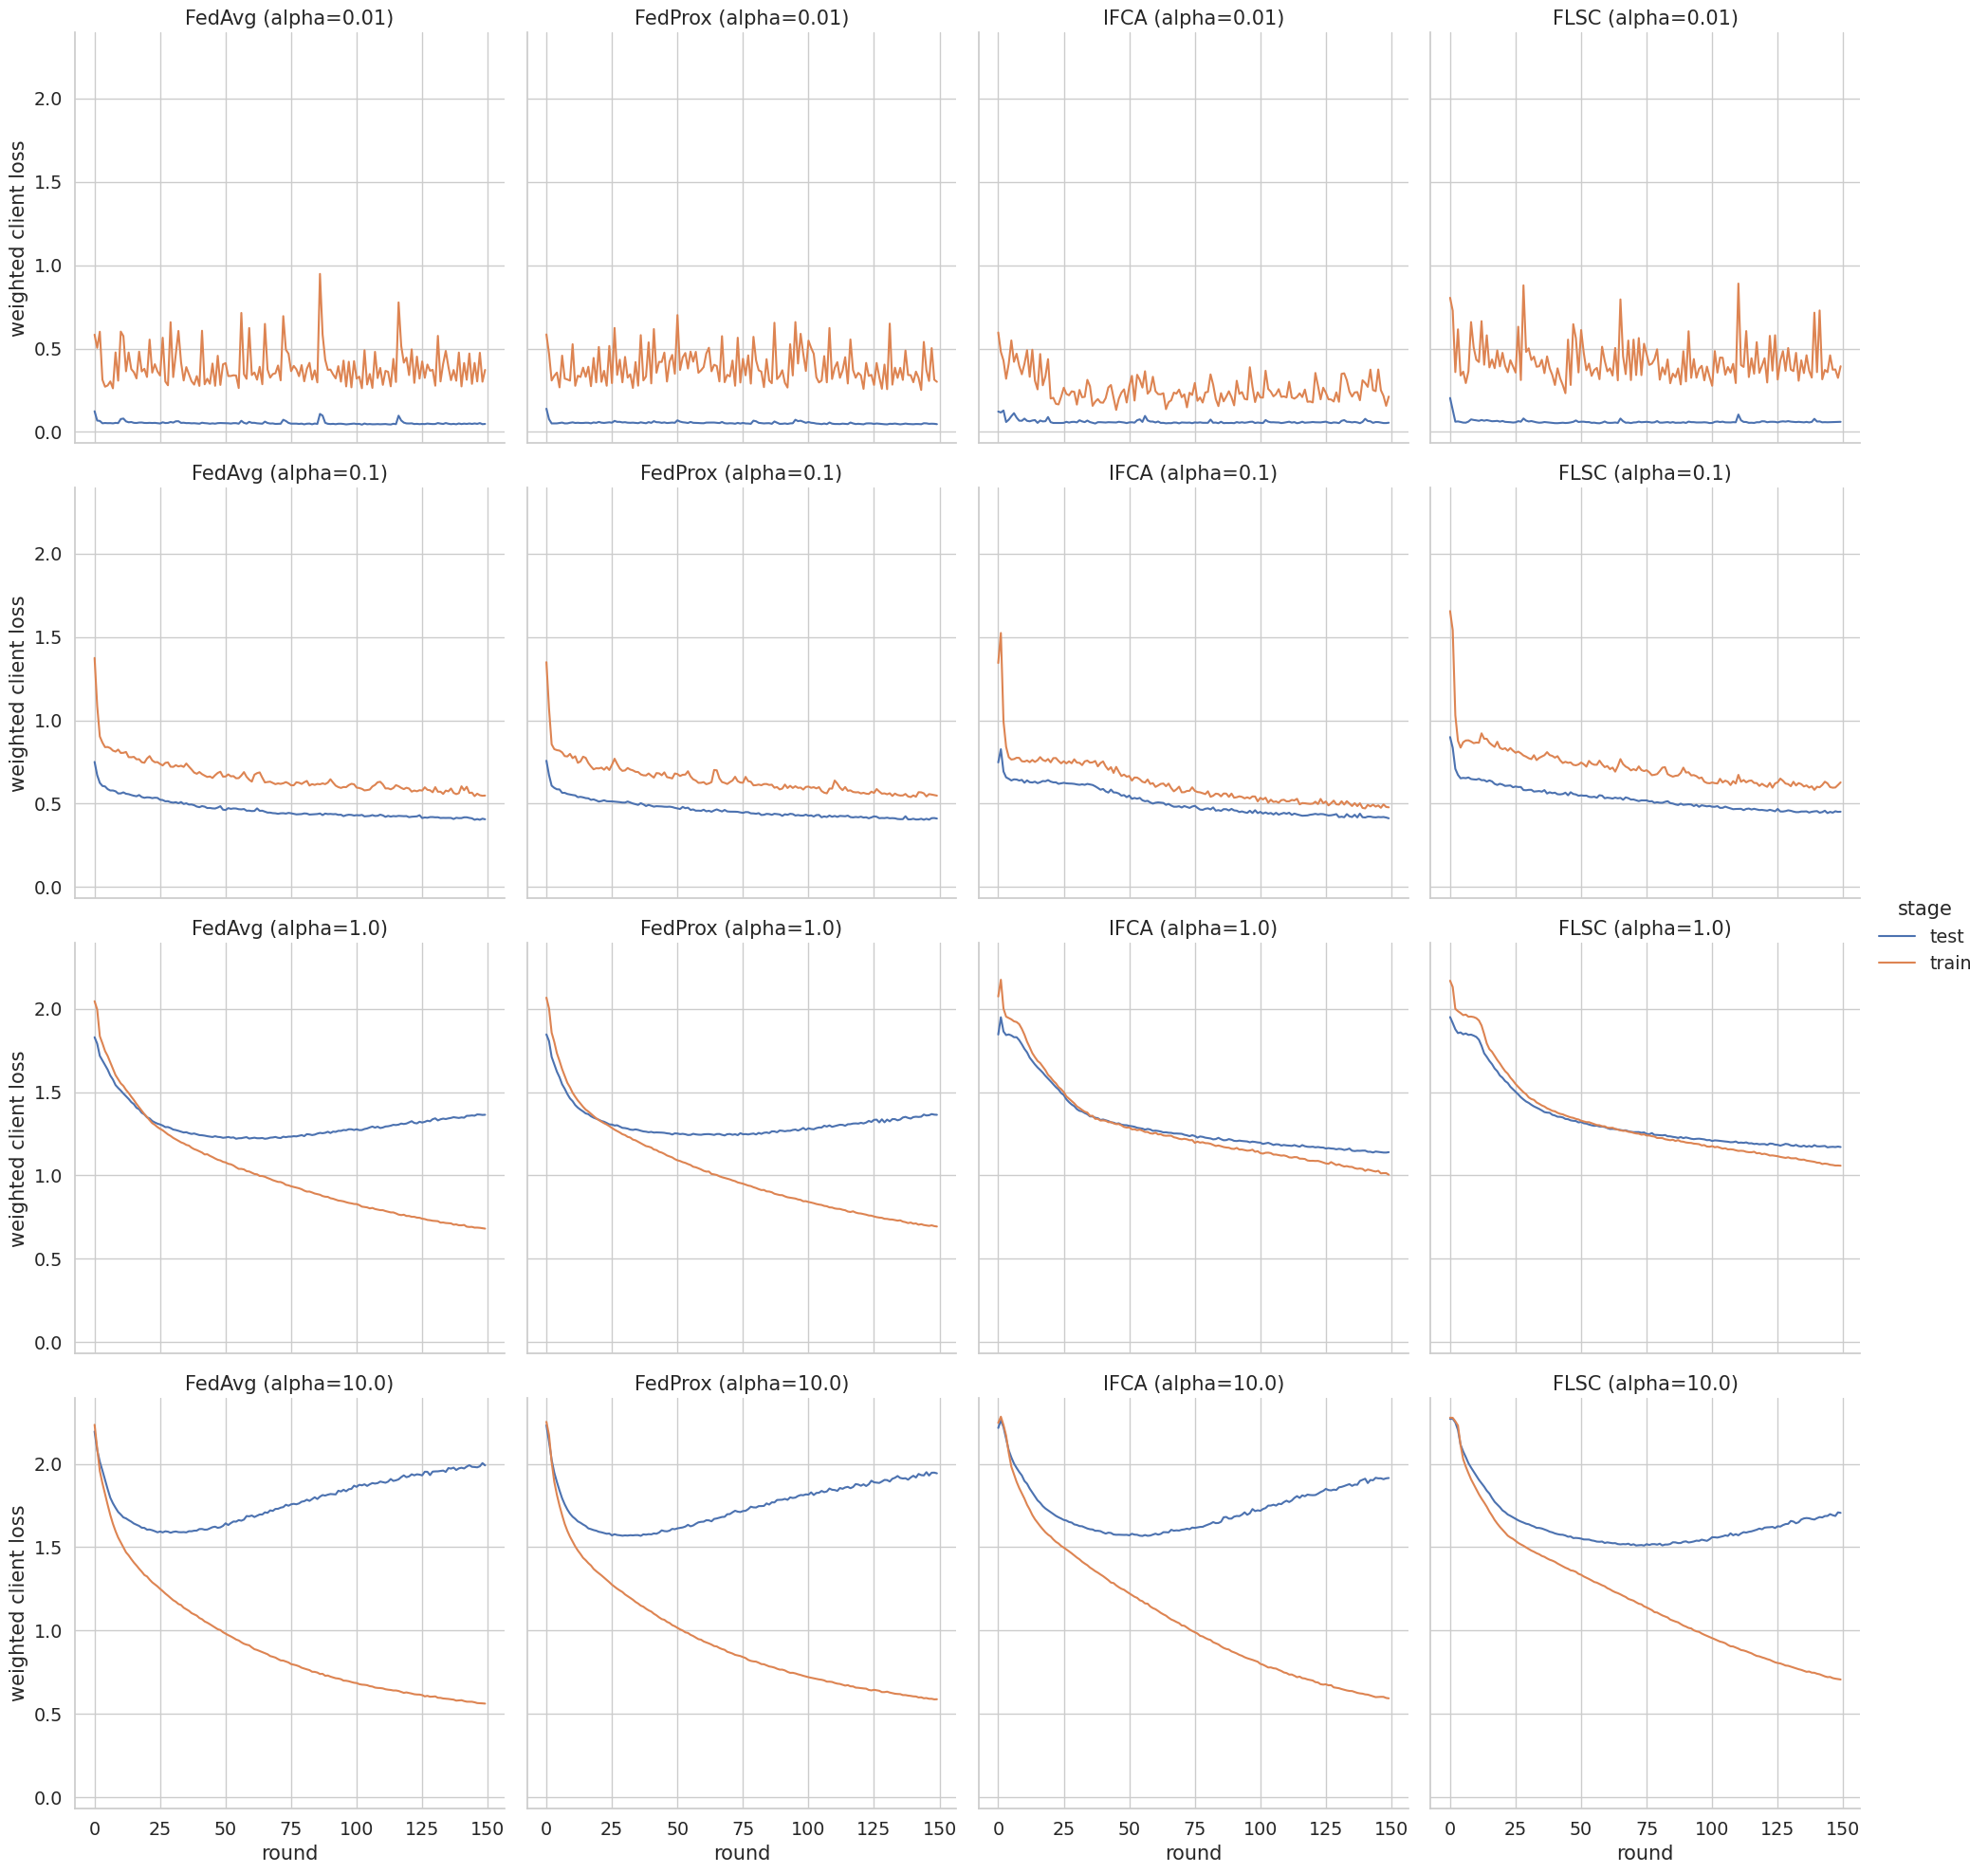

In [22]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

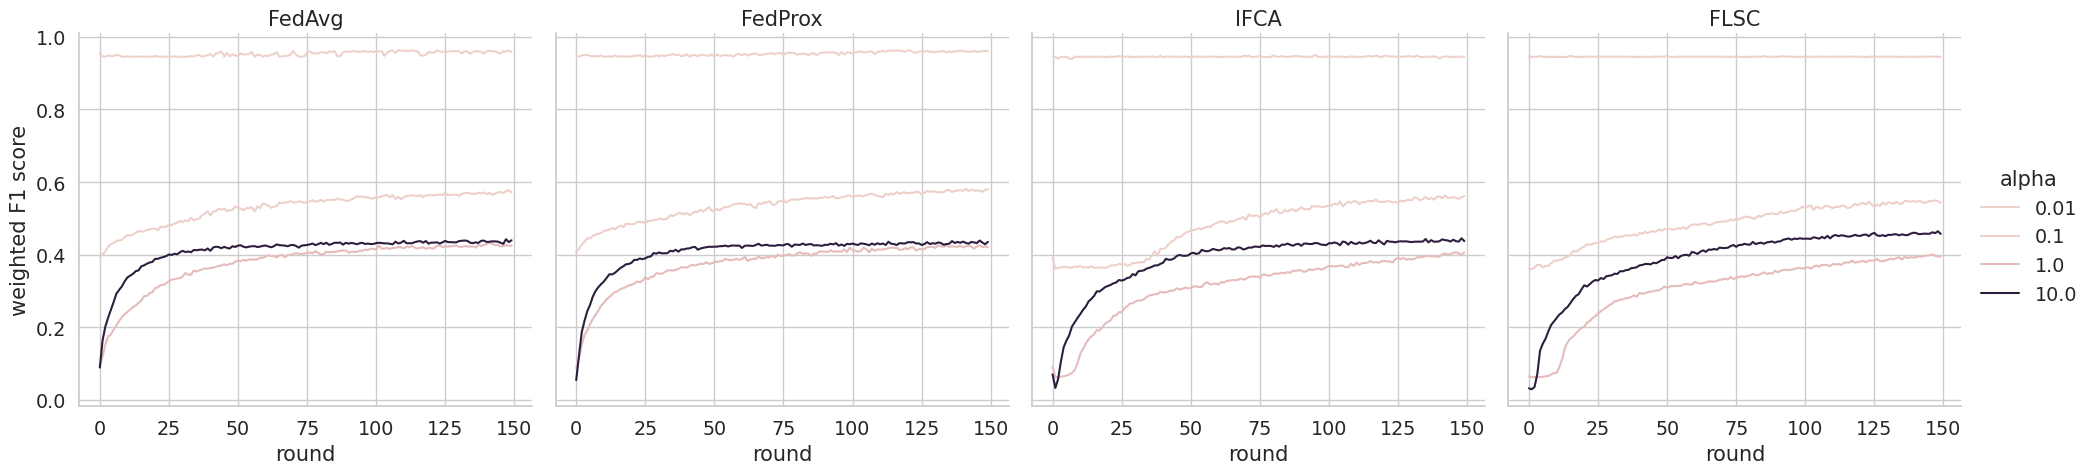

In [23]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

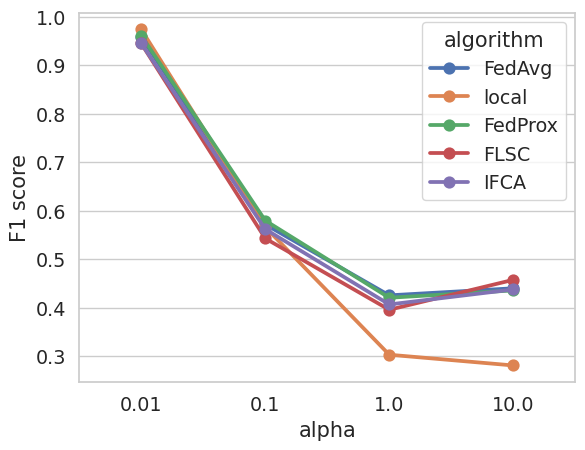

In [24]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [25]:
conn.close()

### MNIST

In [26]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

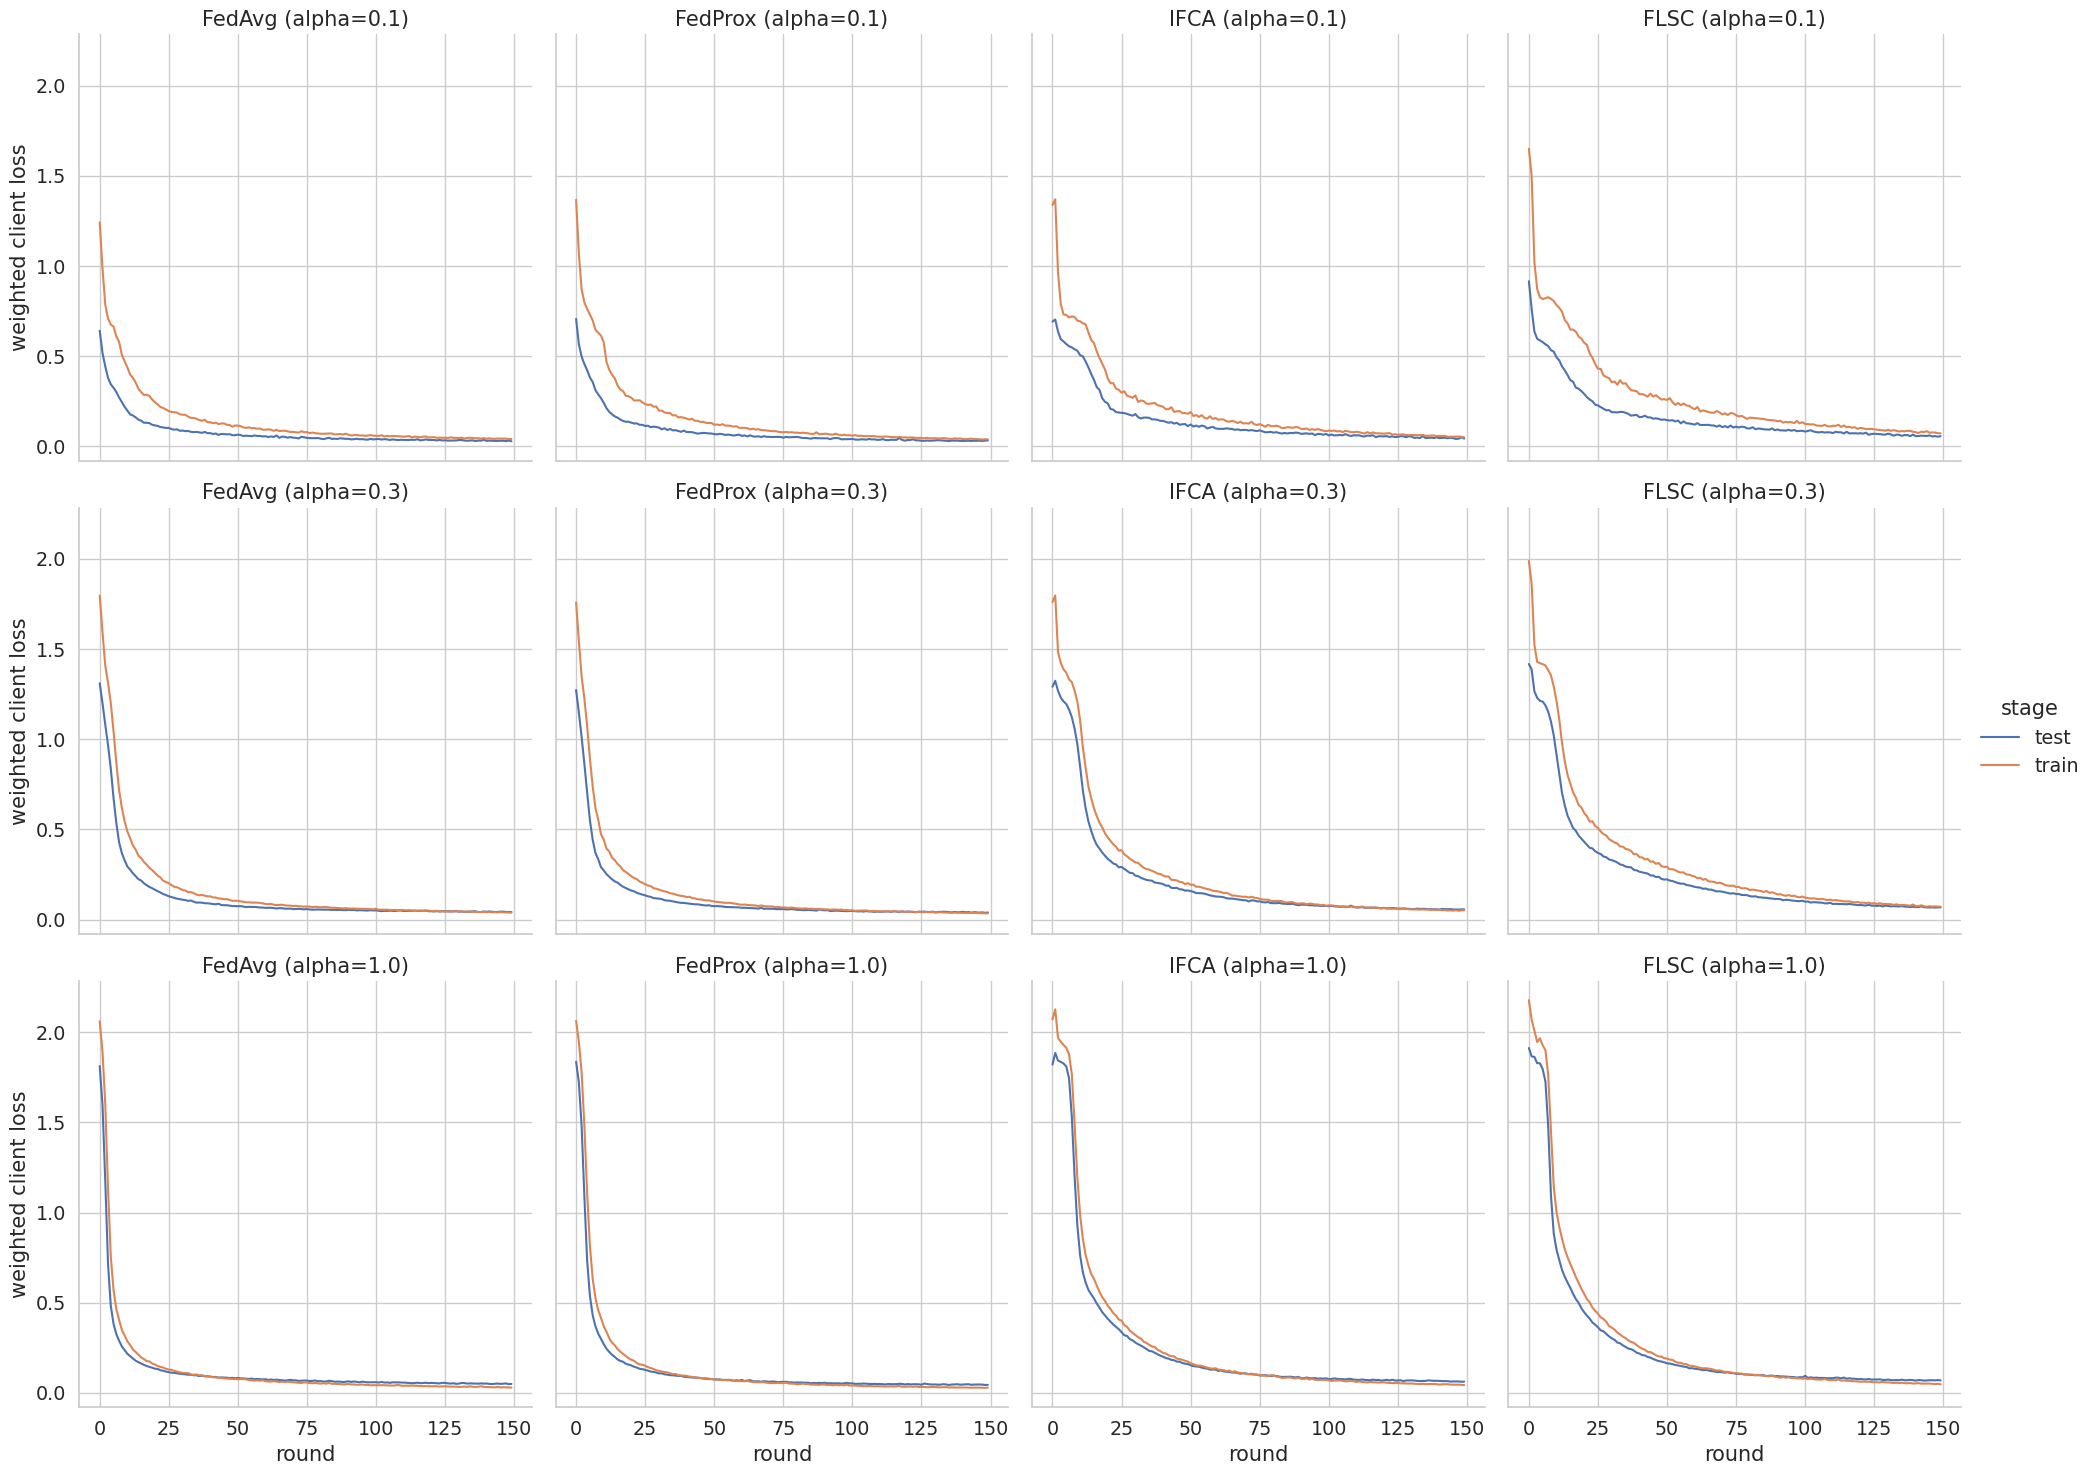

In [27]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

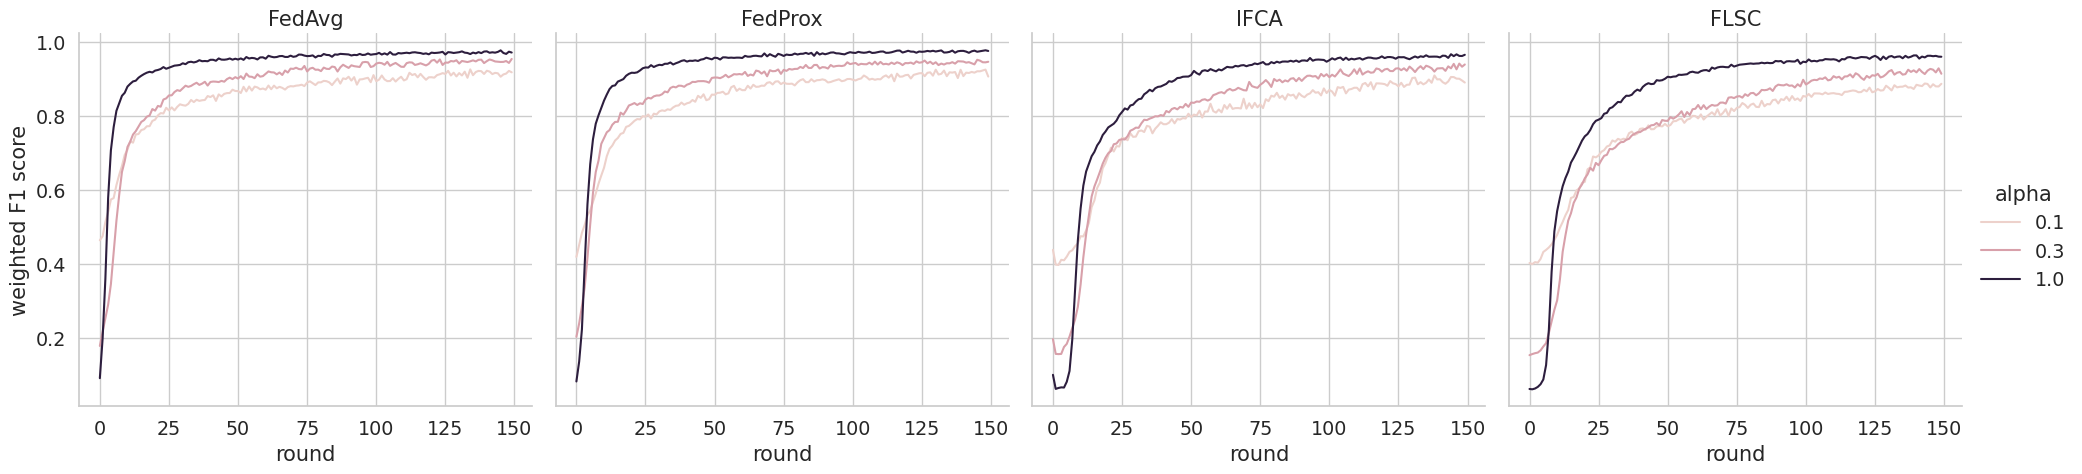

In [28]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

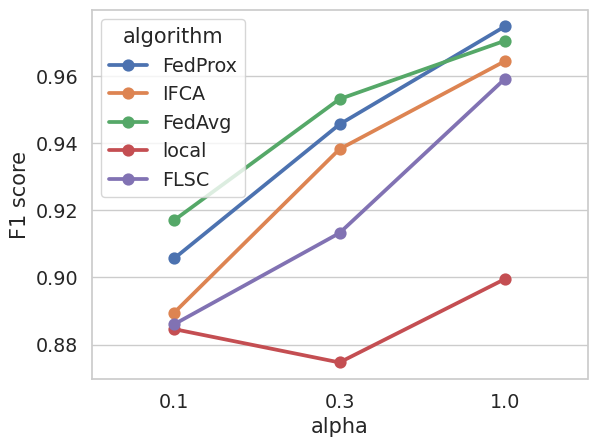

In [29]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [30]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [31]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

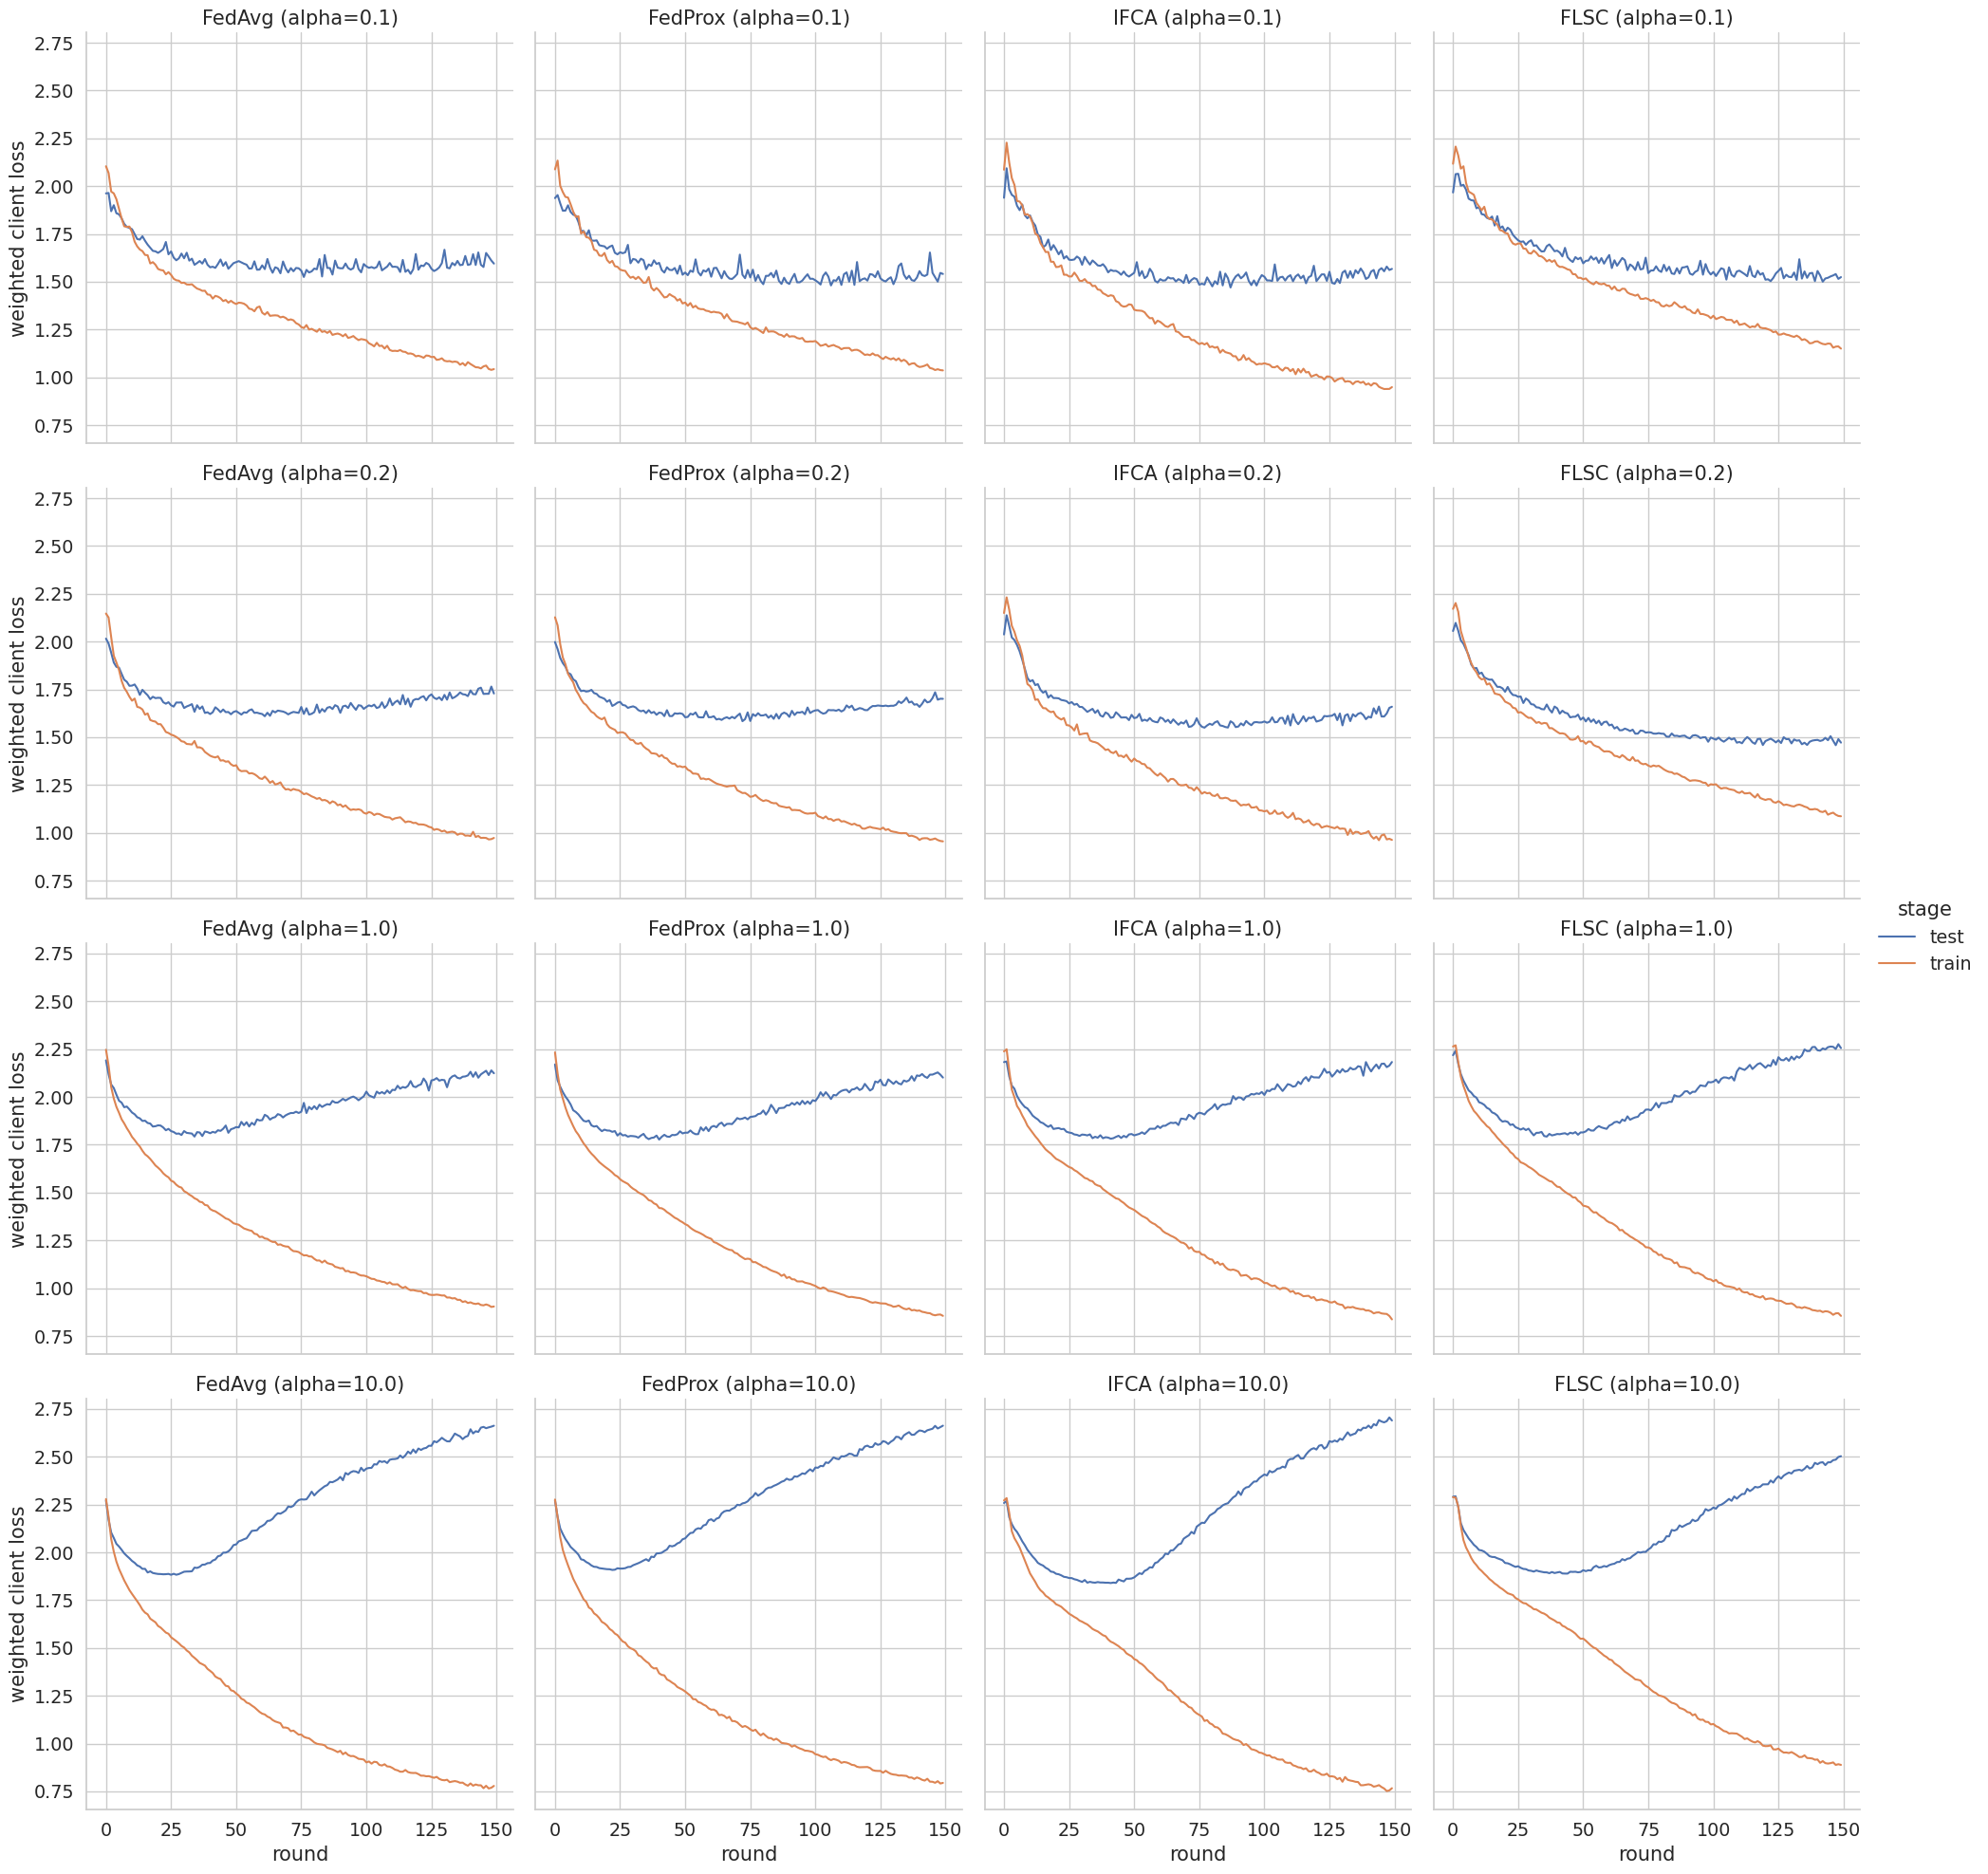

In [32]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

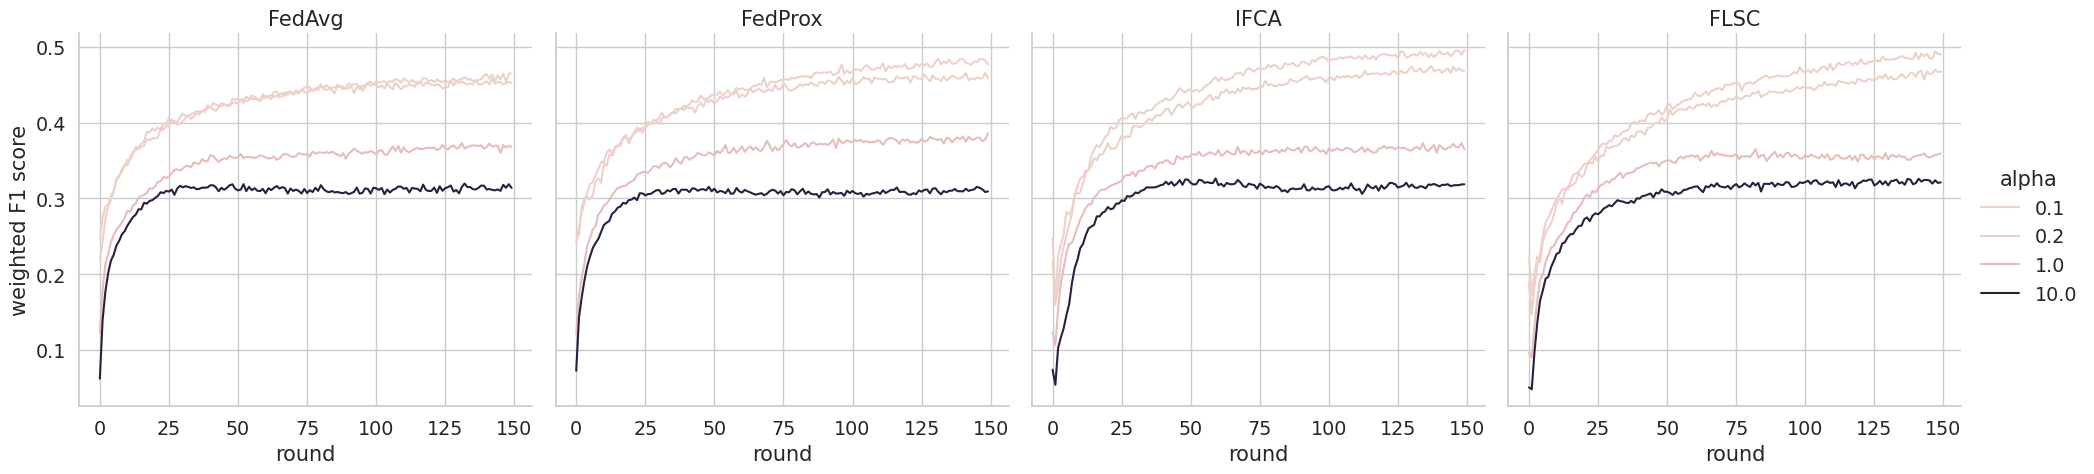

In [33]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

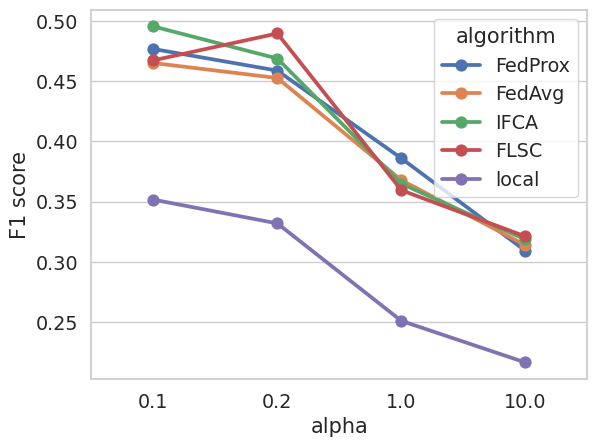

In [34]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [35]:
conn.close()

### MNIST

In [36]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

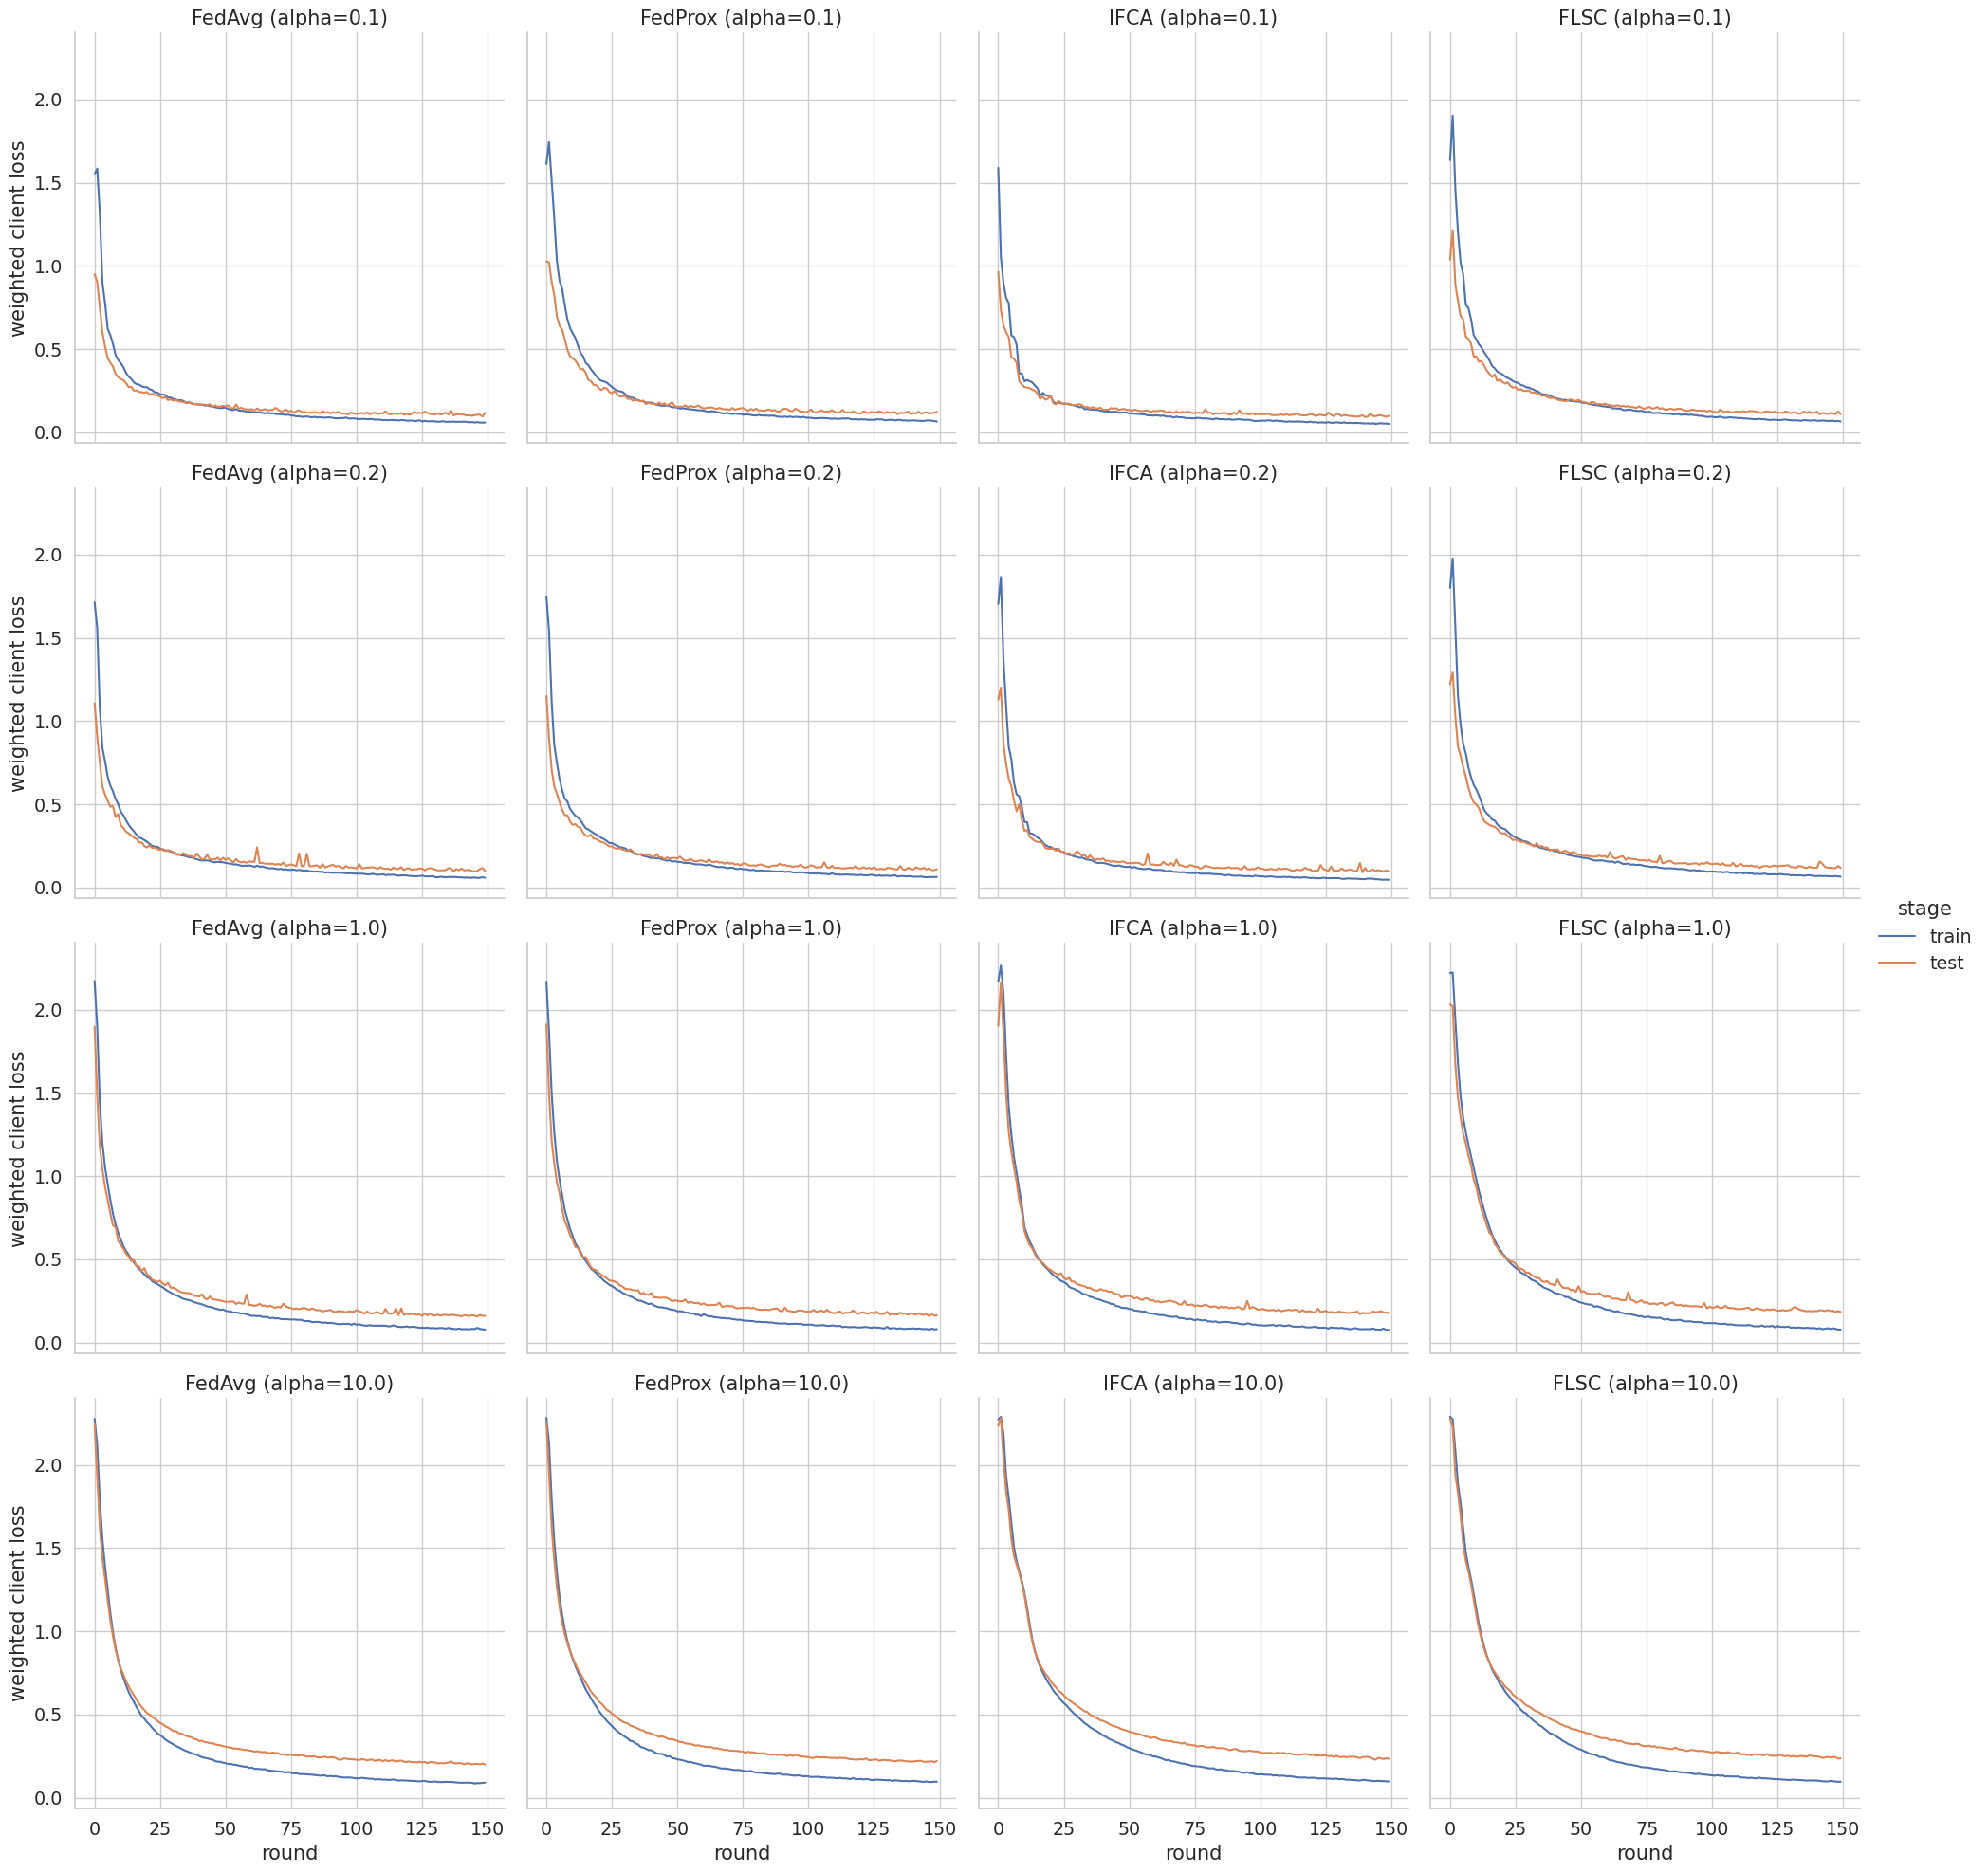

In [37]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

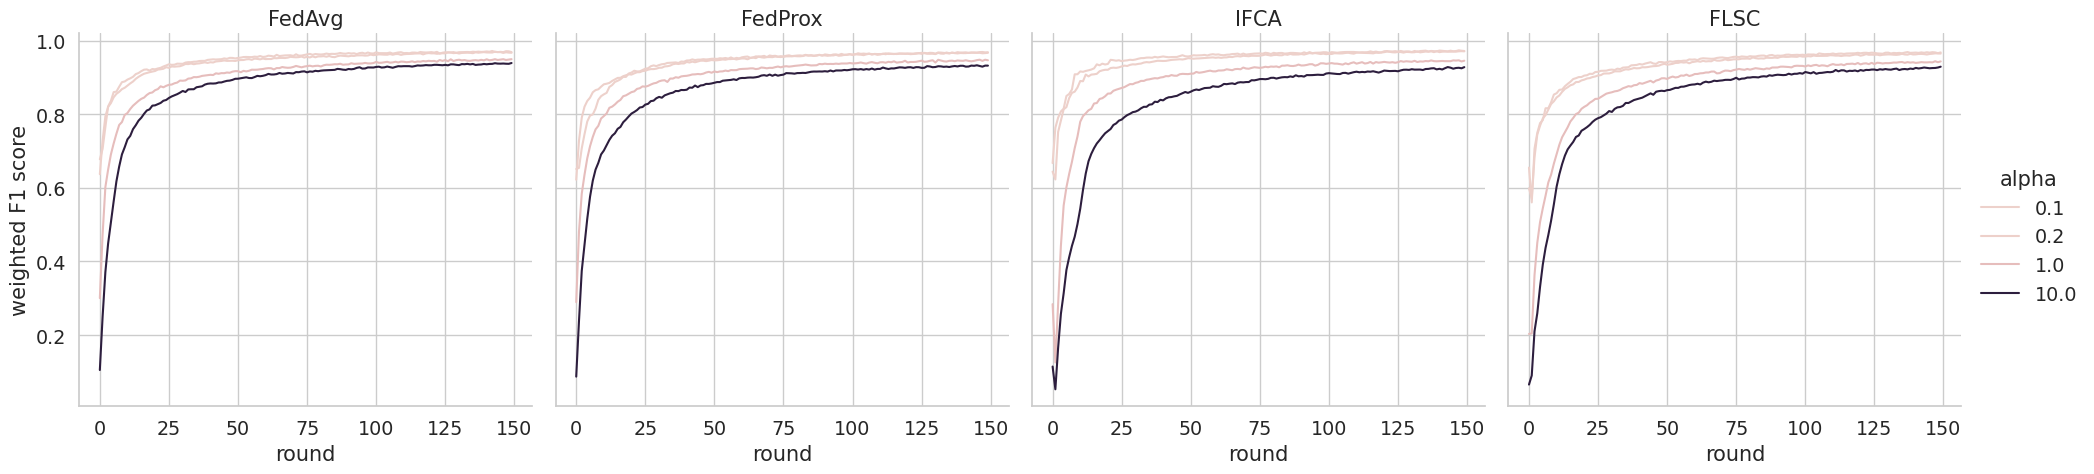

In [38]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

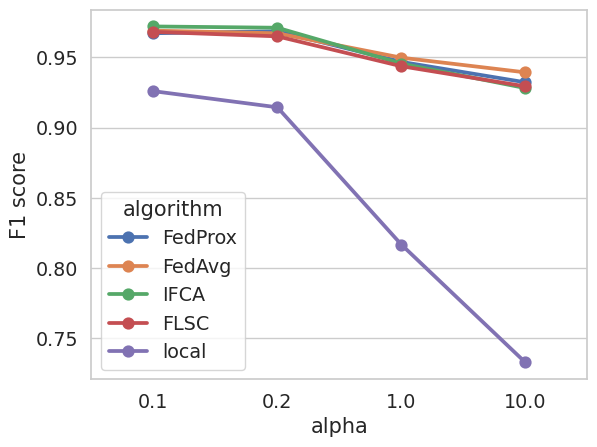

In [39]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [40]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [41]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [42]:
benefits = compute_client_benefit(conn, data)

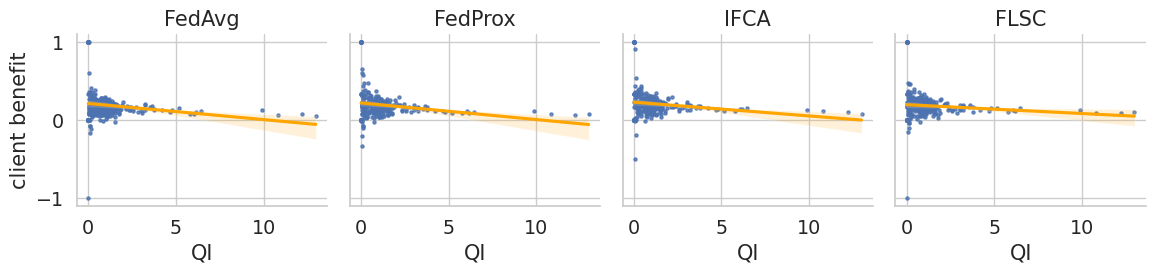

In [43]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

In [44]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/quantity")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0    FedAvg   0.215297  1.756950e-38 -0.020646  0.011166  0.015106
1      FLSC   0.199594  6.177534e-40 -0.011311  0.123314  0.003846
2      IFCA   0.231864  3.178660e-47 -0.017644  0.020814  0.012081
3   FedProx   0.222097  3.307031e-42 -0.021294  0.007028  0.017382

In [45]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0    FedAvg   0.191518 -0.010072  0.254410 -0.009380  0.317861  0.347820   
1      FLSC   0.201076 -0.009780  0.231442 -0.004791  0.580979  0.073731   
2      IFCA   0.219650 -0.011930  0.157087 -0.005511  0.538091  0.190956   
3   FedProx   0.198266 -0.011878  0.168606 -0.006503  0.477810  0.297145   

      p_LDI   adj_Rsq  
0  0.000059  0.055026  
1  0.352192  0.001392  
2  0.019851  0.022224  
3  0.000425  0.046480

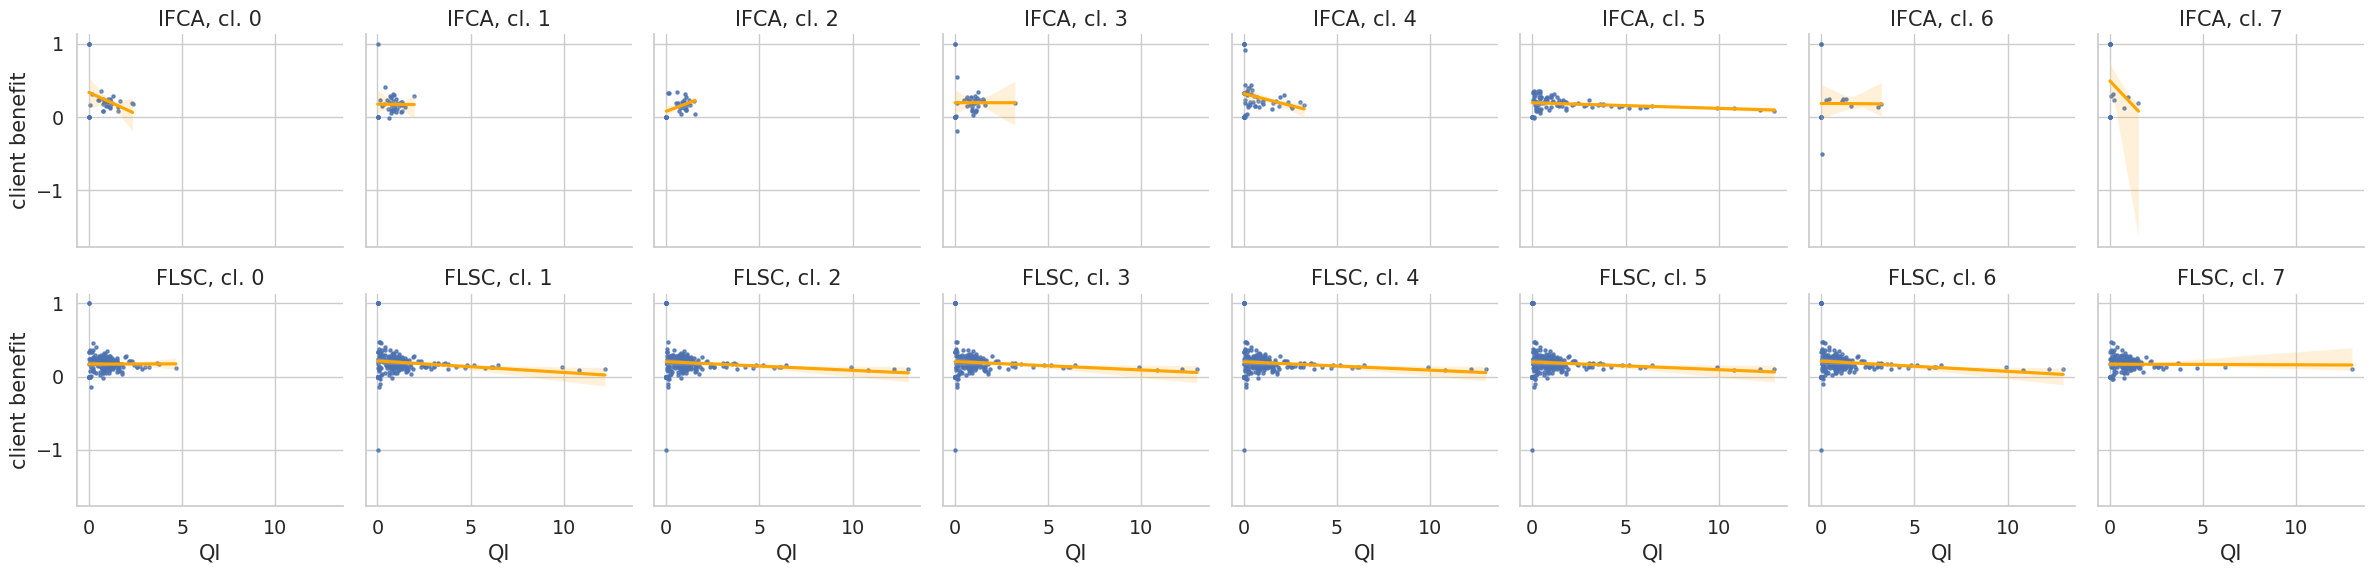

In [46]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

### MNIST

In [47]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [48]:
benefits = compute_client_benefit(conn, data)

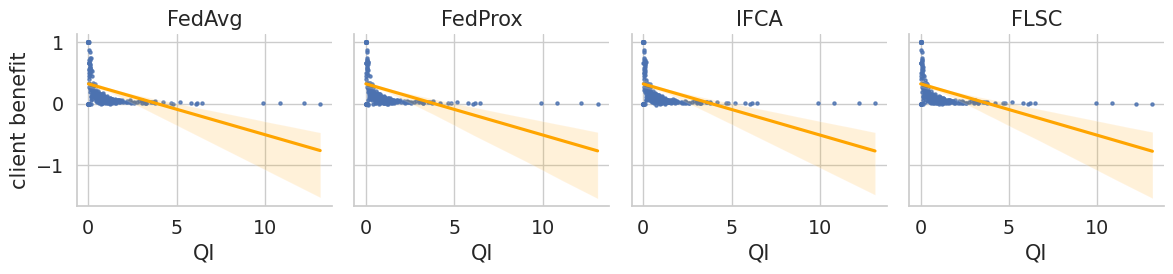

In [49]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

In [50]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/quantity")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0   FedProx   0.323068  3.004148e-44 -0.083279  4.034882e-13  0.134471
1      FLSC   0.321692  7.471740e-44 -0.083626  3.585479e-13  0.135032
2      IFCA   0.321089  1.023105e-43 -0.083232  4.588297e-13  0.133859
3    FedAvg   0.322065  2.014817e-44 -0.082807  4.022350e-13  0.134485

In [51]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0   FedProx   0.097332 -0.026804  0.004429  0.018220  0.095934  1.494176   
1      FLSC   0.097069 -0.027137  0.004005  0.017441  0.111332  1.499357   
2      IFCA   0.100389 -0.027138  0.004064  0.015741  0.151258  1.498589   
3    FedAvg   0.092609 -0.027060  0.004415  0.022438  0.042390  1.447456   

          p_LDI   adj_Rsq  
0  5.091696e-43  0.492975  
1  3.580867e-43  0.494026  
2  4.950138e-43  0.491862  
3  1.837123e-40  0.477643

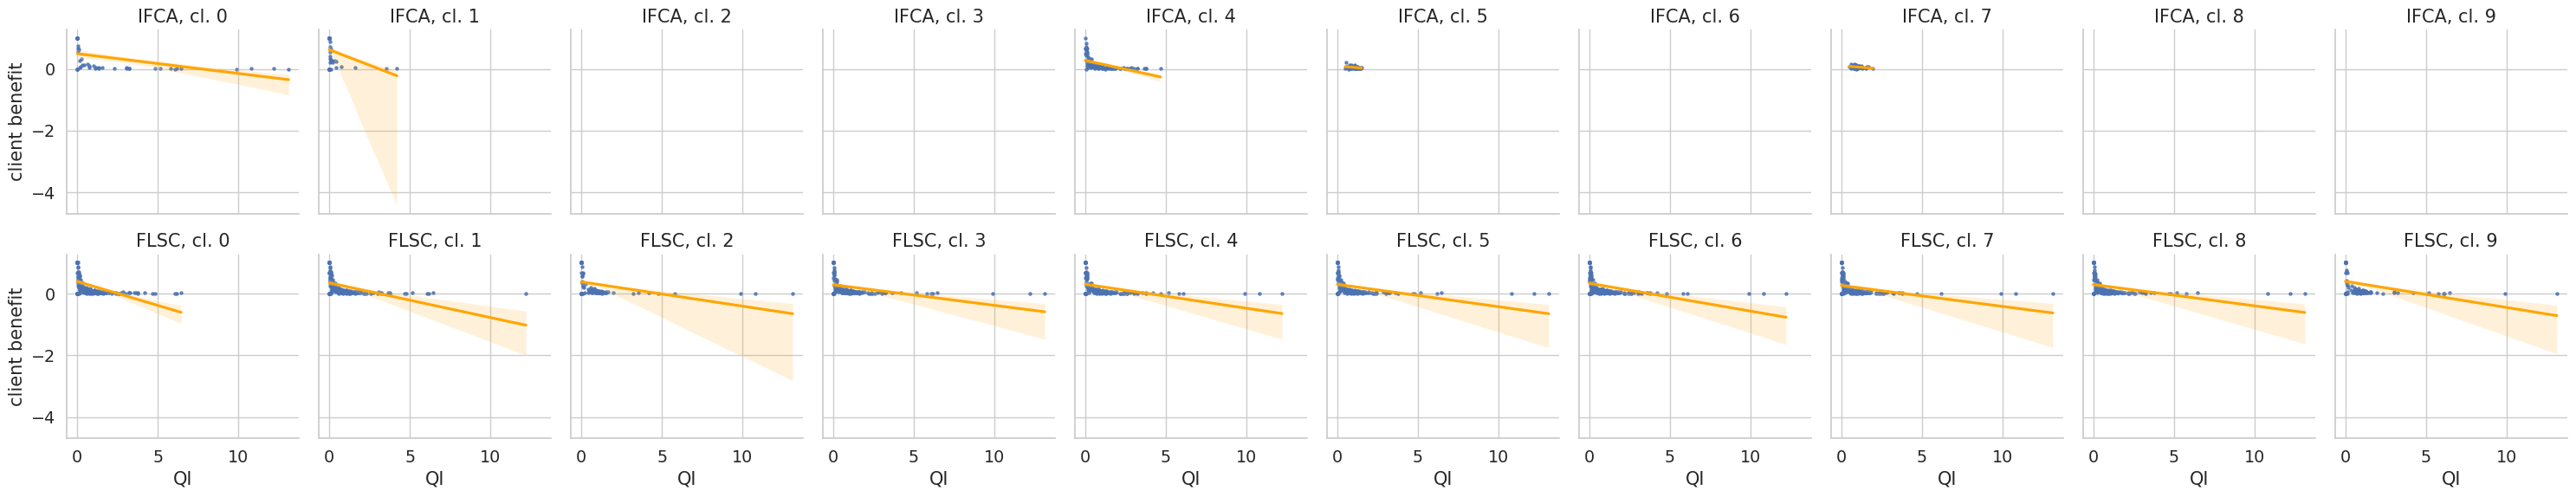

In [52]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [53]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [54]:
benefits = compute_client_benefit(conn, data)

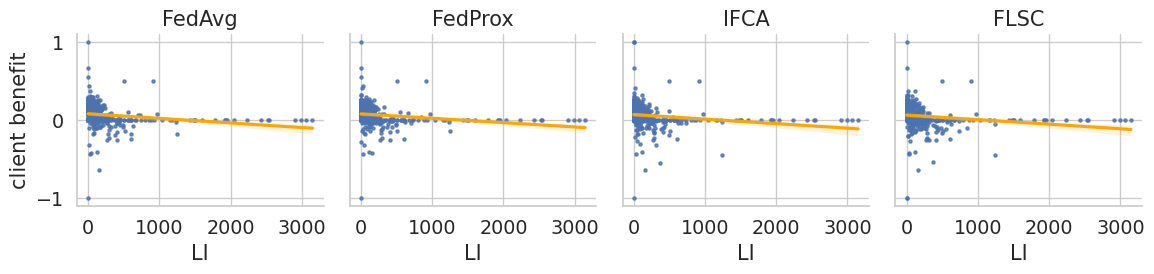

In [55]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

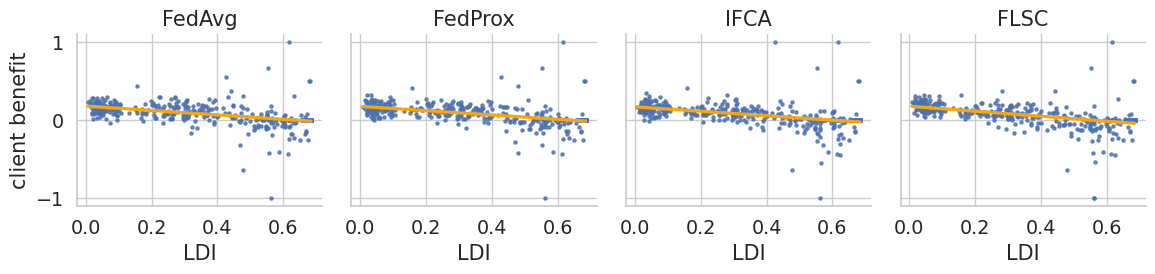

In [56]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10.png"))

In [57]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/label")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0      FLSC   0.055670  2.084376e-08 -0.000661  0.922517 -0.002072
1    FedAvg   0.075265  4.175631e-16 -0.003567  0.566053 -0.001401
2   FedProx   0.072815  2.297285e-16 -0.002152  0.717853 -0.001818
3      IFCA   0.065614  4.076110e-12 -0.004212  0.511584 -0.001188

In [58]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/label")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      FLSC   0.271713 -0.081963  0.019739  0.000212  0.014925 -0.456684   
1    FedAvg   0.242582 -0.054574  0.095030  0.000135  0.095462 -0.368528   
2   FedProx   0.218687 -0.035476  0.253777  0.000090  0.240038 -0.335129   
3      IFCA   0.280170 -0.097579  0.004033  0.000241  0.004075 -0.437866   

          p_LDI   adj_Rsq  
0  1.512771e-13  0.278414  
1  1.148442e-10  0.252677  
2  6.793707e-10  0.262727  
3  1.978418e-13  0.248970

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [ ]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [ ]:
benefits = compute_client_benefit(conn, data)

In [ ]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist.png"))

In [ ]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [ ]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/label")

In [ ]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/label")

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [ ]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [ ]:
benefits = compute_client_benefit(conn, data)

In [ ]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

In [ ]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [ ]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/feature")

In [ ]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on CIFAR-10/feature")

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [ ]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [ ]:
benefits = compute_client_benefit(conn, data)

In [ ]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist.png"))

In [ ]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [ ]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/feature")

In [ ]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on MNIST/feature")

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

In [ ]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

# Client Contribution

## CIFAR-10

In [ ]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [ ]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_cifar10.png"))

### Feature Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_cifar10.png"))

In [ ]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_cifar10.png"))

In [ ]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on CIFAR-10/feature")

In [ ]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on CIFAR-10/feature")

## MNIST

In [ ]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [ ]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_mnist.png"))

### Feature Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_mnist.png"))

In [ ]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_mnist.png"))

In [ ]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on MNIST/feature")

In [ ]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on MNIST/feature")